# Results from the student survey

Thank you all for filling out the survey. Are you curious to know what our class population is like? I am. It helps me better tailor the course to the audience. 

Know your audience! \[This comment will make more sense in week 5...\]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt                # for plots
import seaborn as sea
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Google form results are collected in a google sheet. I downloaded it to a csv file, removed personal information and loaded it into a pandas dataframe. Pandas is our primary data management tool. We start working with pandas in week 3. 

In [26]:
responses = pd.read_csv('survey_f23.csv')
names = ['class', 'econ', 'coding', 'lang', 'stat', 'ols', 'news', 'post']
responses.columns = names
responses[['class', 'econ', 'coding', 'lang', 'stat', 'ols', 'news']].sample(5)

class econ  coding                                               lang  \
113  Junior  Yes       4                                             Python   
2    Senior  Yes       3                                          R, Python   
23   Senior  Yes       4                                          R, Python   
68   Senior  Yes       3                                       Java, C, C++   
83   Senior  Yes       4  STATA, I have only used one time of it when I ...   

     stat  ols                 news  
113     2   No  A few times a month  
2       3  Yes    A few days a week  
23      3  Yes            Every day  
68      2  Yes  A few times a month  
83      3   No  Only when I have to

## Results from the survey

I have left the code here so that those who are curious can take a look. I do not expect you all to understand it yet. In about three weeks from now, though, this will be second-nature. 

### What is your coding background?

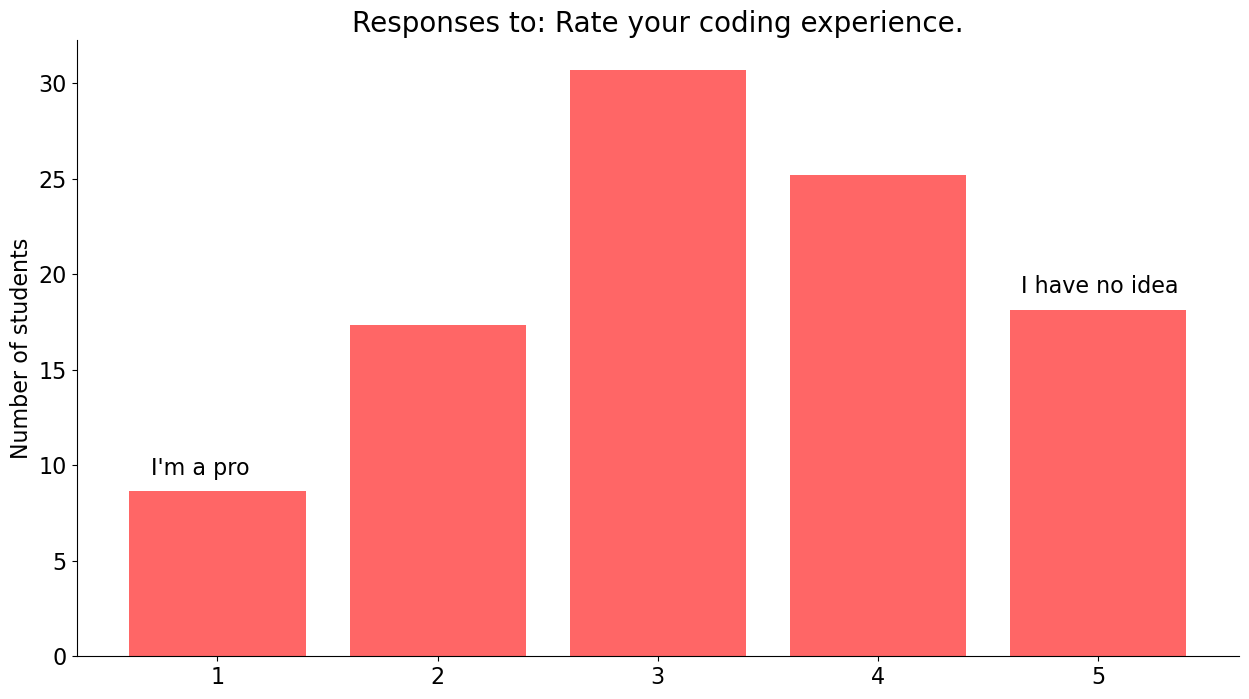

In [19]:
fig, ax = plt.subplots(figsize=(15,8))

h = responses['coding'].groupby(responses['coding']).count()
tot = h.sum()

ax.bar(h.index, h/tot*100, color='red', alpha=0.6)

ax.set_ylabel('Number of students', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.text(0.7,9.5,'I\'m a pro', fontsize=16)
ax.text(4.65,19,'I have no idea', fontsize=16)

ax.set_title('Responses to: Rate your coding experience.', fontsize=20)


sea.despine()

plt.savefig('code.png')

This course assumes you know nothing about coding. For those of you who have some coding experience, the first few weeks of class might be a bit easier, but we will get to more difficult (i.e., powerful) coding soon. 

If you are a pro, and you want to work on something else during the first few weeks of class, drop me a line. I always have some packages I'm trying to learn about, and you can help!

### What is your econometric background?

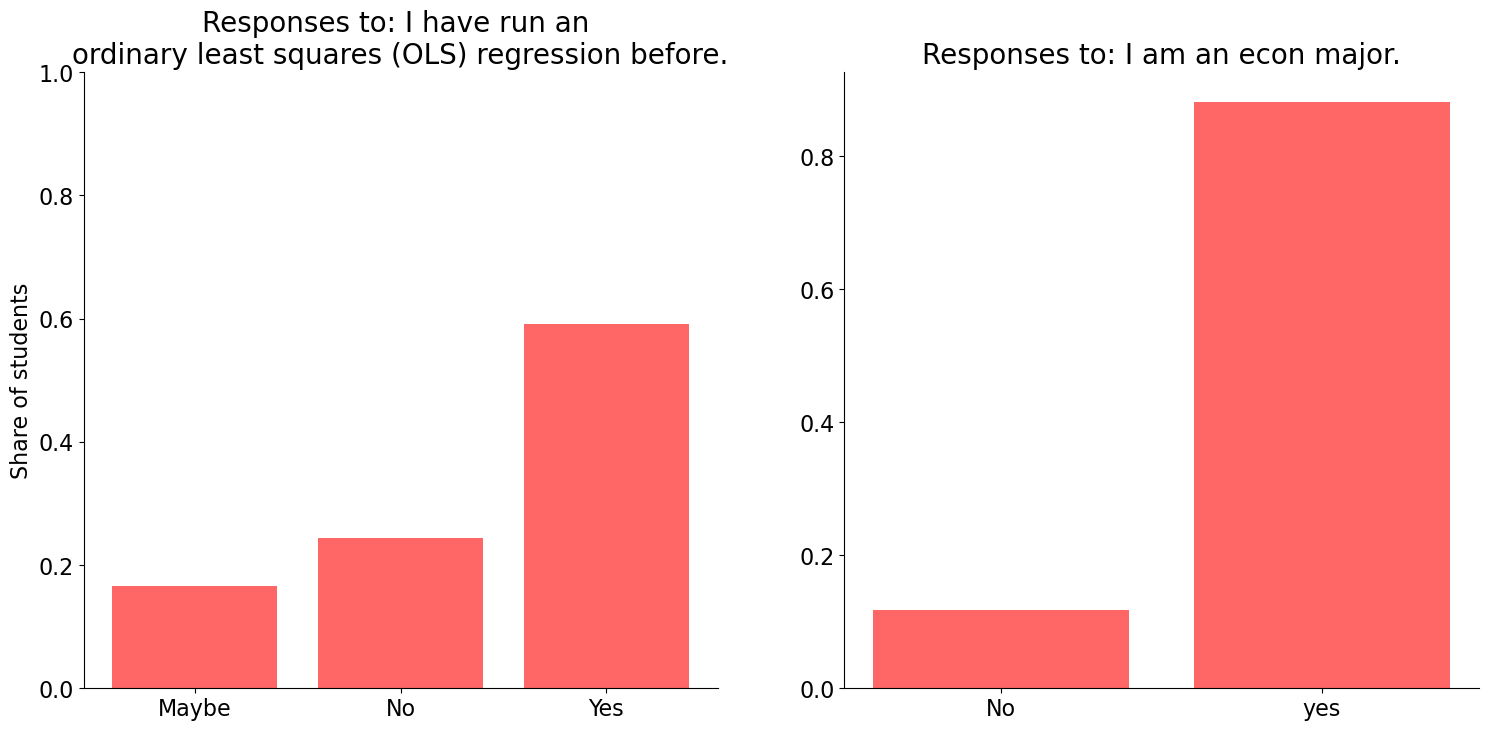

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

ols = responses['ols'].groupby(responses['ols']).count()
ols = ols/ols.sum()

temp = responses['econ'].groupby(responses['econ']).count()
temp = temp/temp.sum()
econ = pd.Series([temp.loc[temp.index!='Yes'].sum(), temp['Yes']], index = ['No', 'yes'])


ax[0].bar(ols.index, ols, color='red', alpha=0.6)
ax[1].bar(econ.index, econ, color='red', alpha=0.6)

ax[0].set_ylabel('Share of students', fontsize=16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=16)

ax[0].set_ylim(0,1)
ax[0].set_title('Responses to: I have run an \nordinary least squares (OLS) regression before.', fontsize=20)
ax[1].set_title('Responses to: I am an econ major.', fontsize=20)

sea.despine(ax=ax[0])
sea.despine(ax=ax[1])
plt.savefig('ols.png')

Given that most students are econ majors, this is about what I would expect. Econometrics is not a prerequisite, but some of you may want to run regressions in your projects. Running regressions in python is at least as easy as it is STATA.  

### What are your future plans?

Now we are moving on to free-form text responses. Textual data can be very informative, but is a bit harder to analyze as there is not a natural ordering like we have with numbers. 

Below is a word cloud, which is a visualization of a frequency table. We count how many times a word appears in the responses and then we make the size of the word proportional to the word's frequency in the data. 

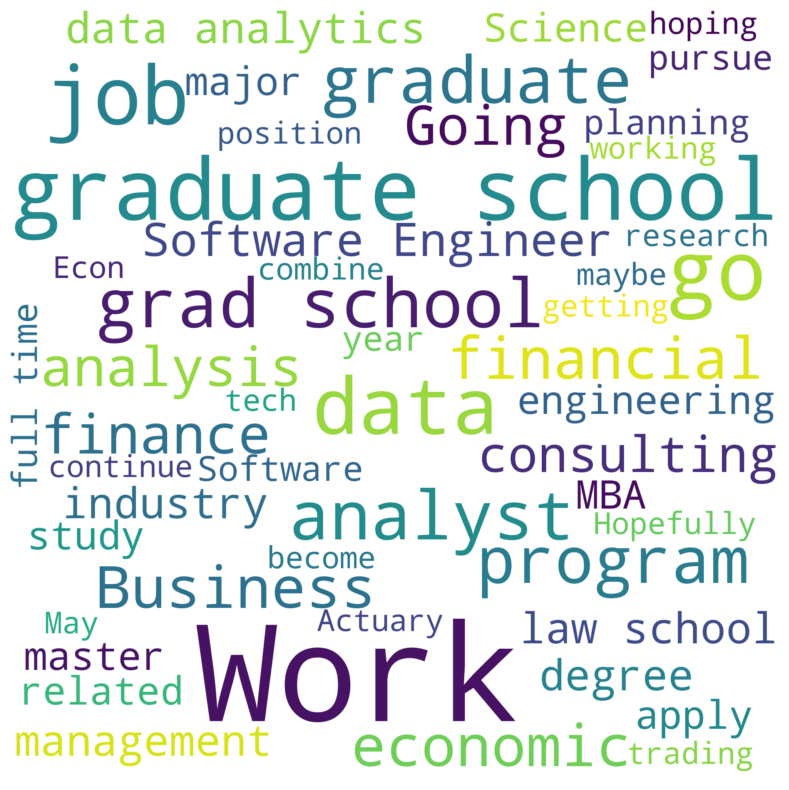

In [22]:
text = " ".join(reply for reply in responses.post)

stopwords = set(STOPWORDS)
stopwords.update(["find", "want", "will"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50, background_color="white", stopwords=stopwords, height=2000, width=2000).generate(text)

# Display the generated image:
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.savefig('post.png')
plt.show()

I am not surprised that 'work' and 'graduate school' are common responses. 'Data,' 'analytics,' and 'analyst' are also  prominent. You all are in the right place! 

### What languages do you speak?

Rather than go the word-cloud route, this time I am computing the frequency table, taking the top responses, and plotting them in a bar chart. 

In [23]:
langs = []

# Missing responses are nans, the others are strings
for x in responses.lang:
    if type(x)==float:
        langs.append(x)
    else:
        ylist = x.split(',')
        for y in ylist:
            langs.append(y)
    
lgs = pd.Series(langs)
lgs = lgs.str.lower()
lgs = lgs.str.strip()
lgs_count = lgs.value_counts()
print(lgs_count)


stata                                                                          85
python                                                                         74
r                                                                              61
java                                                                           19
matlab                                                                          8
c                                                                               5
javascript                                                                      3
sql                                                                             3
c++                                                                             2
c#                                                                              2
julia                                                                           2
i have only used one time of it when i took econ 310                            1
java and c      

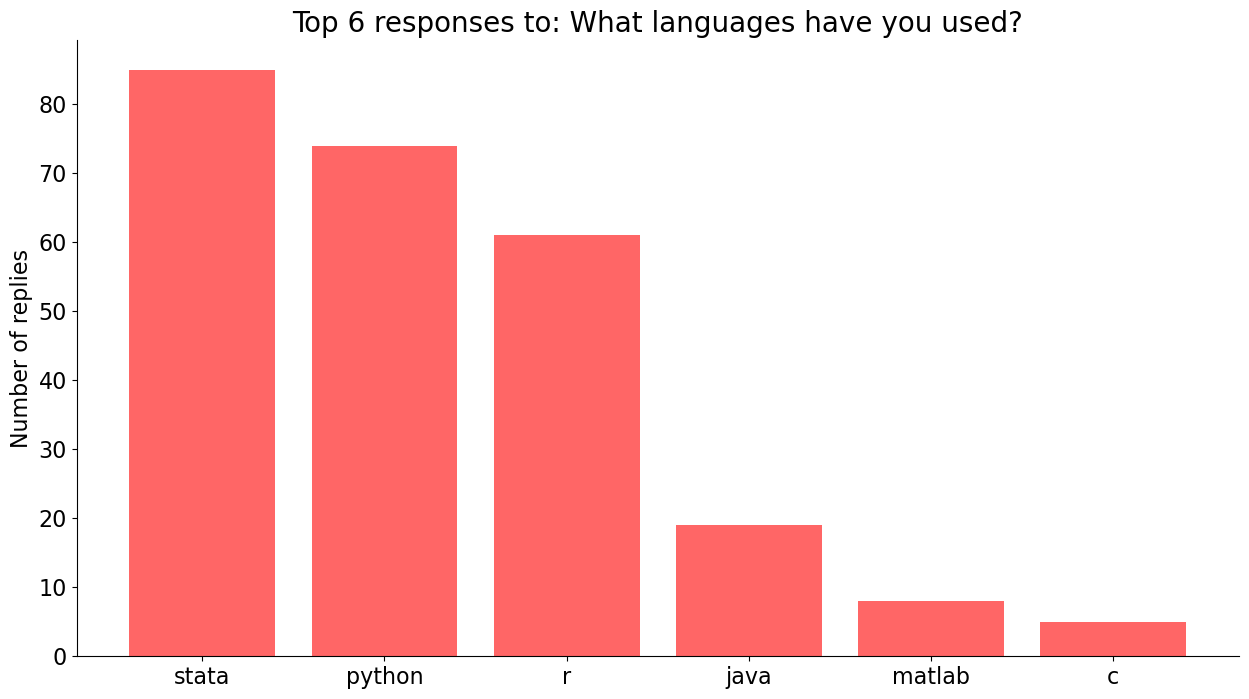

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

h = lgs_count.iloc[0:6]

ax.bar(h.index, h, color='red', alpha=0.6)

ax.set_ylabel('Number of replies', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_title('Top 6 responses to: What languages have you used?', fontsize=20)


sea.despine()
plt.savefig('lang.png')

This lines up pretty well with the popularity of these languages in use on github as detailed in the [state of the octoverse](https://octoverse.github.com/). 

![Code popularity from github.](https://badgerdata.org/images/code_popularity_21.png)

The exception, of course, is STATA. STATA is a highly specialized language meant for econometrics. It's long history of use in economics means that it has the capacity to perform highly specialized and complex econometric models. You will not see too much STATA outside of academia, which is one of the reasons this course is taught in python.  

### Anything else you want me to know?

Some common themes: 

* I don't know anything about coding and am nervous...don't be!
* Is the empahsis coding or data...both!
* Where can I go for extra help...Satyen, Mitchell, and I are always available to help. The internet is a great resource.

### Let's get going!

Regardless of where you are in these distributions, this class should be useful, and maybe even fun. If you find yourself needing some help along the way, please reach out to me and/or the TAs.  